# EDA for parallel corpus, mono corpus and dict

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

## Базовая информация о датасете до изменений

In [2]:
file_path = '/kaggle/input/mansi-russian-parralel-corpus/overall_80K.csv'
data = pd.read_csv(file_path, index_col=0)

data_info = {
    "shape": data.shape,
    "columns": data.columns.tolist(),
    "head": data.head()
}
data_info

{'shape': (81146, 2),
 'columns': ['target', 'source'],
 'head':                                               target  \
 0  Та пыгрисит маим вармаль э̄рнэ поратэт ат верм...   
 1  Ха̄йтыматэ тӯр ва̄тан ёхтыс, вит ва̄тан ха̄йтыс.    
 2                          Вит са̄мыл сунсым о̄нтыс    
 3        Атаявев, акваг лылынг тагл ворн та тотавев.   
 4  Ман ты пӣлтал,  веськат хумиюв  нэтхуньт ат ёр...   
 
                                               source  
 0  Те мальчики не выполнят задание в назначенный ...  
 1    Бегая к берегу озера пришла, к воде подбежала.   
 2                          Вода прибывала на глазах   
 3        Обнюхивает нас, живыми на кладбище уносит.   
 4     Мы никогда не забудем этого честного человека.  }

In [3]:
import re
from collections import Counter


def tokenize(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return words

def text_statistics(column):
    sentences = column.str.split('[.!?]', expand=True).stack()  
    words = column.apply(tokenize).explode() 
    unique_words = Counter(words) 
    
    stats = {
        "num_sentences": len(sentences),
        "num_words": len(words),
        "num_unique_words": len(unique_words)
    }
    return stats

target_stats = text_statistics(data['target'])
source_stats = text_statistics(data['source'])

target_stats, source_stats

({'num_sentences': 155632, 'num_words': 926801, 'num_unique_words': 64250},
 {'num_sentences': 156074, 'num_words': 690832, 'num_unique_words': 63018})

## Рассмотрим сначала parallel corpus
### Проанализируем данные на деффект Г Е Р М А Н И Я и найдем дупликаты

In [4]:
parallel_data = pd.read_csv('/kaggle/input/mansi-russian-parralel-corpus/overall_80K.csv', index_col=0)
pattern = r'\S\s\S\s\S\s\S\s\S\s'
result_source = parallel_data['source'][parallel_data.source.str.contains(pattern)]
result_target = parallel_data['target'][parallel_data.target.str.contains(pattern)]

In [5]:
result_source.tolist()

['Там наши работающие люди Марина Викторовна С а м с о н о в а , М а р и я Владимировна Ситн и к о в а , Л ю д м и л а Мелентьева, Ирина Кошелева ос Ирина Ибрагимова, наш мансийский мастер Александр Сайнахов они там так усердно готовились',
 'У моей бабушки по матери младший брат – Сайнахов И в а н Д м и т р и е в и ч .',
 'Михаил Ку з ь м и ч М ол д а н о в второе место взял и Попов Иван Алексеевич третьим был',
 'А н а т о л и й В а л е й  в совхозе « С а р а н п а у л ь с к и й » руководителем работает, он сказал, в этом году 25 оленых людей для соревнований с гор спустились',
 'Кондинскими манси вязанные вещи Р а и с а Решетникова там показывала.',
 'Николай Евлахов я̄нас пӯльницат урыл потыртас, рущ щирыл ч а ст н ы й к л и н и к а г ла̄вавет.',
 'А н ь Ху л ю м с ӯ н т пӯльницат ат лēккар рӯпитэ̄гыт.']

In [6]:
strange_sentences = [
    'Там наши работающие люди Марина Викторовна Самсонова, Мария Владимировна Ситникова, Людмила Мелентьева, Ирина Кошелева и Ирина Ибрагимова, наш мансийский мастер Александр Сайнахов, они там так усердно готовились.',
    'У моей бабушки по матери младший брат – Сайнахов Иван Дмитриевич.',
    'Михаил Кузьмич Молданов второе место взял и Попов Иван Алексеевич третьим был.',
    'Анатолий Валей в совхозе «Саранпаульский» руководителем работает, он сказал, в этом году 25 оленых людей для соревнований с гор спустились.',
    'Кондинскими манси вязанные вещи Раиса Решетникова там показывала.',
    'Николай Евлахов я̄нас пӯльницат урыл потыртас, рущ щирыл частный клиникагла̄вавет.',
    'Ань Хулюм сӯнт пӯльницат ат лēккар рӯпитэ̄гыт'
]

for idx, sentence in zip(result_source.index, strange_sentences):
    parallel_data.at[idx, 'source'] = sentence

parallel_data.loc[result_source.index, 'source']

6111     Там наши работающие люди Марина Викторовна Сам...
6111     Там наши работающие люди Марина Викторовна Сам...
6113     У моей бабушки по матери младший брат – Сайнах...
6113     У моей бабушки по матери младший брат – Сайнах...
6120     Михаил Кузьмич Молданов второе место взял и По...
6120     Михаил Кузьмич Молданов второе место взял и По...
6244     Анатолий Валей в совхозе «Саранпаульский» руко...
6244     Анатолий Валей в совхозе «Саранпаульский» руко...
11934    Кондинскими манси вязанные вещи Раиса Решетник...
11934    Кондинскими манси вязанные вещи Раиса Решетник...
19448    Николай Евлахов я̄нас пӯльницат урыл потыртас,...
19448    Николай Евлахов я̄нас пӯльницат урыл потыртас,...
20068        Ань Хулюм сӯнт пӯльницат ат лēккар рӯпитэ̄гыт
20068        Ань Хулюм сӯнт пӯльницат ат лēккар рӯпитэ̄гыт
Name: source, dtype: object

In [7]:
duplicates = parallel_data[parallel_data.duplicated()]
parallel_data.drop(duplicates.index, axis=0, inplace=True)

In [8]:
print(f"""
Кол-во кейсов на Мансийском с дефектом написания слов через пробел: {result_target.shape[0]}
Кол-во кейсов на Русском с дефектом написания слов через пробел: {result_source.shape[0]}
Кол-во полных дупликатов: {duplicates.shape[0]}
""")


Кол-во кейсов на Мансийском с дефектом написания слов через пробел: 847
Кол-во кейсов на Русском с дефектом написания слов через пробел: 7
Кол-во полных дупликатов: 267



In [9]:
parallel_data.reset_index(drop=True, inplace=True)

### Посмотрим на кол-во NaN values и информацию о корпусе 

In [10]:
print("Dataset Info:")
parallel_data.info()

print("\nMissing values:")
print(parallel_data.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80433 entries, 0 to 80432
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  80433 non-null  object
 1   source  80433 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB

Missing values:
target    0
source    0
dtype: int64


### Посмотрим на корреляцию длин предложений источника и цели

In [11]:
parallel_data['source_length'] = parallel_data['source'].apply(lambda x: len(x.split()))
parallel_data['target_length'] = parallel_data['target'].apply(lambda x: len(x.split()))

print("\nSummary of Source Text Lengths:")
print(parallel_data['source_length'].describe())
print("\nSummary of Target Text Lengths:")
print(parallel_data['target_length'].describe())


Summary of Source Text Lengths:
count    80433.000000
mean         8.439471
std          4.890925
min          1.000000
25%          5.000000
50%          7.000000
75%         11.000000
max        188.000000
Name: source_length, dtype: float64

Summary of Target Text Lengths:
count    80433.000000
mean         8.194062
std          5.265709
min          1.000000
25%          5.000000
50%          7.000000
75%         10.000000
max        150.000000
Name: target_length, dtype: float64


Некоторые длины вяглядят аномальными, посмотрим на те, которые больше 50

In [12]:
parallel_data[parallel_data['source_length'] > 50]

,target,source,source_length,target_length
31395,17. Анастасия Кимкъясуй па̄вылт самын патыс. 1...,17. Анастасия родилась в дерне Кимъкясуй. 18. ...,66,66
31401,4. Татьяна Саранпа̄выл школа а̄стламе юи-па̄лт...,4. Татьяна после окончания Саранпаульской школ...,70,68
31409,25. А̄ще о̄лмēт йӣвныл са̄всыр хурит ёргыс. 26...,25. Отец был мастером резьбы по дереву. 26. Из...,74,68
31787,5. Э̄кваг-о̄йкаг акван-минамēн па̄сныл ань нал...,"5. С того момента, как они поженились, прошло ...",86,71
31795,27. Па̄вланылт на̄й постын станция о̄ньщēгыт. ...,27. В лесном поселении имеется переносная стан...,58,55
31806,34. Ирина Константиновна Поята Ха̄льӯс район Л...,34. Ирина Константиновна Поята родилась и выро...,188,150
31815,51. Ты ха̄йтнутыт та̄л сыс акв щёс хотты ма̄ны...,51. Волки один раз в год делают набеги из друг...,68,59
31821,57. Тув миннэ̄в порат тӯр ва̄тат нолвитын щалт...,57. Когда ехали на буранах к месту выпаса олен...,86,72
31825,44. Савва са̄лыянэ «Э̄ти пурн тӯрт» о̄ньщиянэ....,44. Савва место для выпаса оленей выбрал у под...,61,50
31830,13. Ань нэ̄г-хумы̄г хо̄т ня̄врам о̄ньщēг. 14. ...,13. Супруги вырастили шестерых детей. 14. Стар...,57,58


In [13]:
parallel_data[parallel_data['source_length']==188].target.tolist()[0]

'34. Ирина Константиновна Поята Ха̄льӯс район Ло̄пмус па̄вылт самын патыс. 35. А̄ще Константин Корнилович, оматэ Ольга Максимовна Албиныг о̄лсы̄г. 36. Э̄кваг-о̄йкаг колта̄глэ̄нт китхуйплов ня̄врам янмалтасы̄г. 37. Ань са̄т хо̄тпа хультыс.38. Ирина школа а̄стламе юи-па̄лт Салехард ӯс медучилищан ханищтахтуӈкве минас. 39. А̄стламе юи-па̄лт Ямал ма̄н Тарко-Сале ӯс пӯльницан рӯпитаӈкве кēтвес. 40. Тот мощ рӯпитас ос хум ва̄рыс. 41. О̄йкатэ̄н Молдавия ма̄н о̄луӈкве тотвес. 42. Тувыл 1990 та̄лт тэ̄н ювле Ха̄льӯсн щēмьяӈ та̄гыл ва̄нтлысы̄г. 43. Нэ̄ пӯльницат терапевт-лēккарн нё̄тым нёловхуйплов та̄л рӯпитас. 44. Та юи-па̄лт ос физиотерапия ва̄рмаль щирыл э̄лаль ханищтахтас. 45. Ань ты пӯсмалтан ва̄рмаль щирыл Ха̄льӯс пӯльницат китхуйплов та̄л рӯпиты.46. Ирина Константиновна о̄йкатэ̄нтыл кит ня̄врам янмалтасы̄г. 47. Пыгēн юридический академия а̄стлас. 48. Ань Ха̄льӯст о̄лы. 49. А̄гитэ̄н ос Ханты-Мансийск ӯс педколледжит нилыт та̄л ханищтахты.  50. Ма̄н ма̄ньщи щēмьят йильпи та̄л кастыл янытлыя

Мы видим кейсы с "перечислением". Подчистим данные и уберем эти числа для обоих языков.

In [14]:
enumeration = parallel_data[parallel_data.target.str.contains(r'^\d+\.', regex=True)]
enumeration.shape

(463, 4)

In [15]:
pattern = r'\d+\.\s*'
parallel_data.loc[:, 'target'] = parallel_data['target'].str.replace(pattern, '', regex=True)
parallel_data.loc[:, 'source'] = parallel_data['source'].str.replace(pattern, '', regex=True)

In [16]:
parallel_data['source_length'] = parallel_data['source'].apply(lambda x: len(x.split()))
parallel_data['target_length'] = parallel_data['target'].apply(lambda x: len(x.split()))

print("\nSummary of Source Text Lengths:")
print(parallel_data['source_length'].describe())
print("\nSummary of Target Text Lengths:")
print(parallel_data['target_length'].describe())


Summary of Source Text Lengths:
count    80433.000000
mean         8.436935
std          4.869454
min          1.000000
25%          5.000000
50%          7.000000
75%         11.000000
max        168.000000
Name: source_length, dtype: float64

Summary of Target Text Lengths:
count    80433.000000
mean         8.191924
std          5.249019
min          1.000000
25%          5.000000
50%          7.000000
75%         10.000000
max        130.000000
Name: target_length, dtype: float64


In [17]:
parallel_data[parallel_data['source_length']==168].target.tolist()[0]

'Ирина Константиновна Поята Ха̄льӯс район Ло̄пмус па̄вылт самын патыс. А̄ще Константин Корнилович, оматэ Ольга Максимовна Албиныг о̄лсы̄г. Э̄кваг-о̄йкаг колта̄глэ̄нт китхуйплов ня̄врам янмалтасы̄г. Ань са̄т хо̄тпа хультыс.Ирина школа а̄стламе юи-па̄лт Салехард ӯс медучилищан ханищтахтуӈкве минас. А̄стламе юи-па̄лт Ямал ма̄н Тарко-Сале ӯс пӯльницан рӯпитаӈкве кēтвес. Тот мощ рӯпитас ос хум ва̄рыс. О̄йкатэ̄н Молдавия ма̄н о̄луӈкве тотвес. Тувыл 1990 та̄лт тэ̄н ювле Ха̄льӯсн щēмьяӈ та̄гыл ва̄нтлысы̄г. Нэ̄ пӯльницат терапевт-лēккарн нё̄тым нёловхуйплов та̄л рӯпитас. Та юи-па̄лт ос физиотерапия ва̄рмаль щирыл э̄лаль ханищтахтас. Ань ты пӯсмалтан ва̄рмаль щирыл Ха̄льӯс пӯльницат китхуйплов та̄л рӯпиты.Ирина Константиновна о̄йкатэ̄нтыл кит ня̄врам янмалтасы̄г. Пыгēн юридический академия а̄стлас. Ань Ха̄льӯст о̄лы. А̄гитэ̄н ос Ханты-Мансийск ӯс педколледжит нилыт та̄л ханищтахты.  Ма̄н ма̄ньщи щēмьят йильпи та̄л кастыл янытлыянув!О̄лупсанын кӯпнитыг вос о̄лы. Йильпи та̄лт на̄н щуниӈыг вос ēмтэ

Успешно, но теперь разобьем текст на предложения, если его длина больше 128.

In [18]:
parallel_data[parallel_data['source_length'] > 128]

,target,source,source_length,target_length
31806,Ирина Константиновна Поята Ха̄льӯс район Ло̄пм...,Ирина Константиновна Поята родилась и выросла ...,168,130


In [19]:
def split_by_sentences(text, max_words=128):
    sentences = re.split(r'(?<=[.!?])\s+', text) 
    current_part = []
    current_word_count = 0
    parts = []
    
    for sentence in sentences:
        sentence_word_count = len(sentence.split())
        
        if current_word_count + sentence_word_count <= max_words:
            current_part.append(sentence)
            current_word_count += sentence_word_count
        else:
            
            parts.append(' '.join(current_part))
            current_part = [sentence]
            current_word_count = sentence_word_count
    
    if current_part:
        parts.append(' '.join(current_part))
    
    return parts

print(split_by_sentences(parallel_data[parallel_data['target_length'] > 128].target.tolist()[0]))
print(split_by_sentences(parallel_data[parallel_data['source_length'] > 128].source.tolist()[0]))

['Ирина Константиновна Поята Ха̄льӯс район Ло̄пмус па̄вылт самын патыс. А̄ще Константин Корнилович, оматэ Ольга Максимовна Албиныг о̄лсы̄г. Э̄кваг-о̄йкаг колта̄глэ̄нт китхуйплов ня̄врам янмалтасы̄г. Ань са̄т хо̄тпа хультыс.Ирина школа а̄стламе юи-па̄лт Салехард ӯс медучилищан ханищтахтуӈкве минас. А̄стламе юи-па̄лт Ямал ма̄н Тарко-Сале ӯс пӯльницан рӯпитаӈкве кēтвес. Тот мощ рӯпитас ос хум ва̄рыс. О̄йкатэ̄н Молдавия ма̄н о̄луӈкве тотвес. Тувыл 1990 та̄лт тэ̄н ювле Ха̄льӯсн щēмьяӈ та̄гыл ва̄нтлысы̄г. Нэ̄ пӯльницат терапевт-лēккарн нё̄тым нёловхуйплов та̄л рӯпитас. Та юи-па̄лт ос физиотерапия ва̄рмаль щирыл э̄лаль ханищтахтас. Ань ты пӯсмалтан ва̄рмаль щирыл Ха̄льӯс пӯльницат китхуйплов та̄л рӯпиты.Ирина Константиновна о̄йкатэ̄нтыл кит ня̄врам янмалтасы̄г. Пыгēн юридический академия а̄стлас. Ань Ха̄льӯст о̄лы. А̄гитэ̄н ос Ханты-Мансийск ӯс педколледжит нилыт та̄л ханищтахты. Ма̄н ма̄ньщи щēмьят йильпи та̄л кастыл янытлыянув!О̄лупсанын кӯпнитыг вос о̄лы.', 'Йильпи та̄лт на̄н щуниӈыг вос ē

Так как таких кейсов немного, это позволяет нам посмотреть глазами разбение, Видно, что текст на русском более объемный, сделаем сплит предложений по нему.

In [20]:
parallel_data.loc[len(parallel_data), ['target', 'source']] = [
    'Ирина Константиновна Поята Ха̄льӯс район Ло̄пмус па̄вылт самын патыс. А̄ще Константин Корнилович, оматэ Ольга Максимовна Албиныг о̄лсы̄г. Э̄кваг-о̄йкаг колта̄глэ̄нт китхуйплов ня̄врам янмалтасы̄г. Ань са̄т хо̄тпа хультыс.Ирина школа а̄стламе юи-па̄лт Салехард ӯс медучилищан ханищтахтуӈкве минас. А̄стламе юи-па̄лт Ямал ма̄н Тарко-Сале ӯс пӯльницан рӯпитаӈкве кēтвес. Тот мощ рӯпитас ос хум ва̄рыс. О̄йкатэ̄н Молдавия ма̄н о̄луӈкве тотвес. Тувыл 1990 та̄лт тэ̄н ювле Ха̄льӯсн щēмьяӈ та̄гыл ва̄нтлысы̄г. Нэ̄ пӯльницат терапевт-лēккарн нё̄тым нёловхуйплов та̄л рӯпитас. Та юи-па̄лт ос физиотерапия ва̄рмаль щирыл э̄лаль ханищтахтас. Ань ты пӯсмалтан ва̄рмаль щирыл Ха̄льӯс пӯльницат китхуйплов та̄л рӯпиты.Ирина Константиновна о̄йкатэ̄нтыл кит ня̄врам янмалтасы̄г. Пыгēн юридический академия а̄стлас.',
    'Ирина Константиновна Поята родилась и выросла в Берёзовском районе деревне Ломбовож. Её отец Константин Корнилович и мать Ольга Максимовна Албины. Родители вырастили двенадцать детей. Сейчас осталось семь человек. Ирина после окончания школы поехала в г. Салехард и поступила в медучилище. Окончив медучилище она осталась в Ямало-Ненецком автономном округе, её направили на работу в городскую больницу г. Тарко-Сале. Немного поработав она вышла замуж. Затем муж увёз её жить к себе на родину в Молдавию. Позже в 1990 году семья вернулась обратно. Там она устроилась в районную больницу помощником терапевта и проработала почти восемнадцать лет. Потом прошла курсы повышения квалификации по специальности физиотерапия. И сейчас она в Берёзовской больнице по этому направлению работает уже более двенадцати лет. Ирина Константиновна с супругом вырастили двоих детей. Сын окончил юридический факультет.'
]

parallel_data.loc[len(parallel_data), ['target', 'source']] = [
    'Ань Ха̄льӯст о̄лы. А̄гитэ̄н ос Ханты-Мансийск ӯс педколледжит нилыт та̄л ханищтахты. Ма̄н ма̄ньщи щēмьят йильпи та̄л кастыл янытлыянув!О̄лупсанын кӯпнитыг вос о̄лы. Йильпи та̄лт на̄н щуниӈыг вос ēмтэ̄гын.Рӯтанын, юртанын ёт са̄в та̄л пуста̄гыл о̄лэ̄н.',
    'Сейчас проживает в Берёзово. Дочь четвёртый год обучается в педколледже г. Ханты-Мансийска. Мы поздравляем эти мансийские семьи с Новым Годом! Пусть ваша жизнь всегда будет лёгкой. Чтобы Новый год принёс вам счастье. Мы желаем вам и вашим близким здоровья на многие года.'
]

In [21]:
parallel_data.drop(parallel_data[parallel_data['source_length'] > 128].index, axis=0, inplace=True)

In [22]:
parallel_data['source_length'] = parallel_data['source'].apply(lambda x: len(x.split()))
parallel_data['target_length'] = parallel_data['target'].apply(lambda x: len(x.split()))

print("\nSummary of Source Text Lengths:")
print(parallel_data['source_length'].describe())
print("\nSummary of Target Text Lengths:")
print(parallel_data['target_length'].describe())


Summary of Source Text Lengths:
count    80434.000000
mean         8.436830
std          4.855985
min          1.000000
25%          5.000000
50%          7.000000
75%         11.000000
max        126.000000
Name: source_length, dtype: float64

Summary of Target Text Lengths:
count    80434.000000
mean         8.191822
std          5.241478
min          1.000000
25%          5.000000
50%          7.000000
75%         10.000000
max        111.000000
Name: target_length, dtype: float64


In [23]:
parallel_data.reset_index(drop=True, inplace=True)

### Теперь, когда данные подготовлены, визуализируем их
Но убираем "странные" предложения на мансийском, найденные выше, так как понятно, что длины этих предложений будут сильно различаться.

In [24]:
pattern = r'\S\s\S\s\S\s\S\s\S\s'
result_target = parallel_data['target'][parallel_data.target.str.contains(pattern)]
suitable_lines = parallel_data.drop(result_target.index, axis=0).index

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


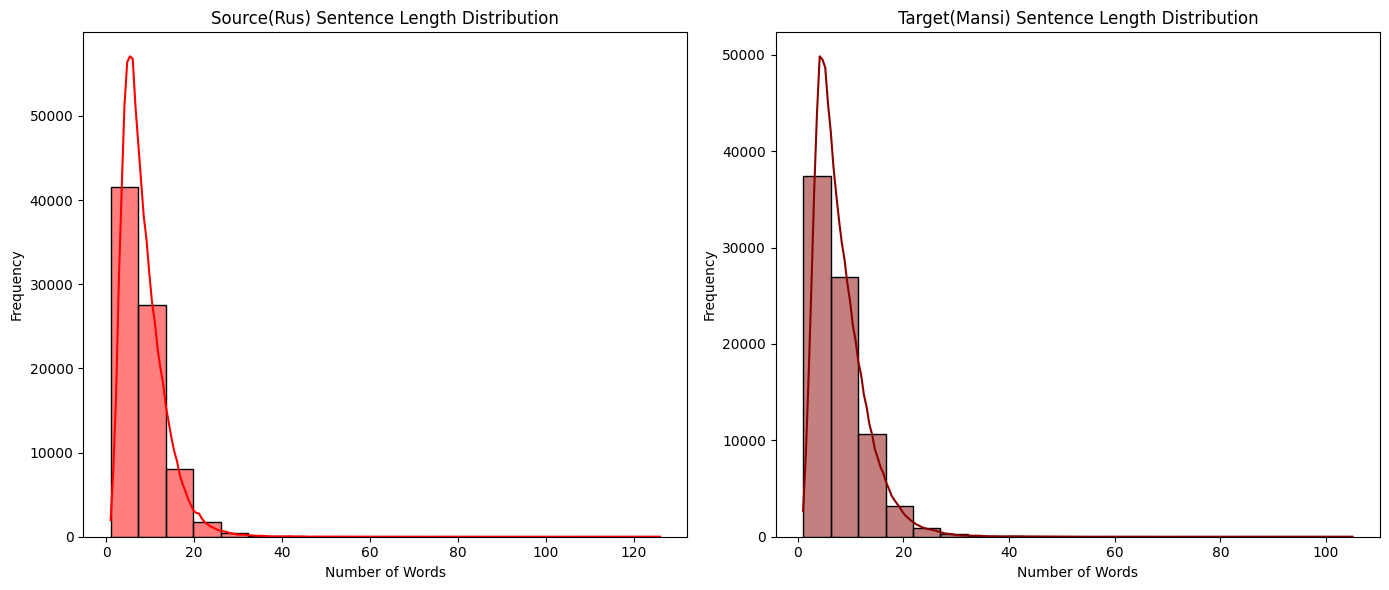

In [25]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
sns.histplot(parallel_data.loc[suitable_lines, 'source_length'], kde=True, bins=20, color='red')
plt.title('Source(Rus) Sentence Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(parallel_data.loc[suitable_lines, 'target_length'], kde=True, bins=20, color='darkred')
plt.title('Target(Mansi) Sentence Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('lenght_distribution.png')
plt.show()

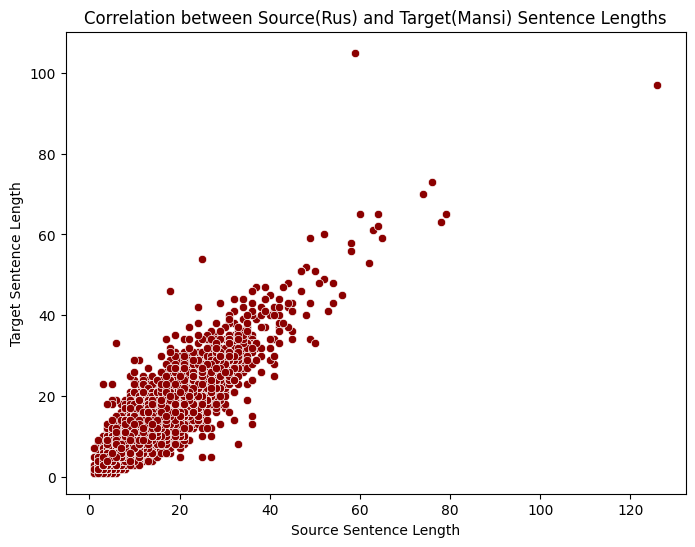

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='source_length', y='target_length', data=parallel_data.loc[suitable_lines], color='darkred')
plt.title('Correlation between Source(Rus) and Target(Mansi) Sentence Lengths')
plt.xlabel('Source Sentence Length')
plt.ylabel('Target Sentence Length')
plt.savefig('corr_1.png')
plt.show()

Странно, есть очень большая разница для некоторых предложений. Проверим.

In [27]:
differ = np.abs(parallel_data.loc[suitable_lines, 'source_length']-parallel_data.loc[suitable_lines, 'target_length'])
parallel_data.loc[(differ > 25).index][['target', 'source']]

,target,source
0,"Ха̄йтыматэ тӯр ва̄тан ёхтыс, вит ва̄тан ха̄йтыс.","Бегая к берегу озера пришла, к воде подбежала."
1,"Тыи сака ёмас сахи, щар я̄ӈк тӯйт хурипа.","Вот эта хорошая шуба, вообще как белый снег."
2,Нох-хилумтэ - тахурип ёмас аги.,Выкопал могилу - такая красивая девушка.
3,"Хотют нох-косамлалаве ке, тавен олунгкв ат рови.","Если кто подпалится, тому жить нельзя."
4,"""Анум ул новекелн, ам, - лавнэтэ, - Атайп-эква...","""Не трогай меня, - говорит девушка, - меня Ата..."
...,...,...
80429,"Тох тай, культура сака тэ̄пгалан мед а̄тим.","В общем, культуры интенсивного потребления мед..."
80430,"Тувыл Уэйтс ты музыкантыг ёт, Чарли Рич ос Фрэ...",Затем Уэйтс отправился на гастроли с такими му...
80431,Тох ман ро̄ви та̄ра юртанын воськасаӈквет?,Но разве можно вот так просто покинуть своих д...
80432,Ирина Константиновна Поята Ха̄льӯс район Ло̄пм...,Ирина Константиновна Поята родилась и выросла ...


In [28]:
differ.describe()

count    79593.000000
mean         1.324790
std          1.453326
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         46.000000
dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


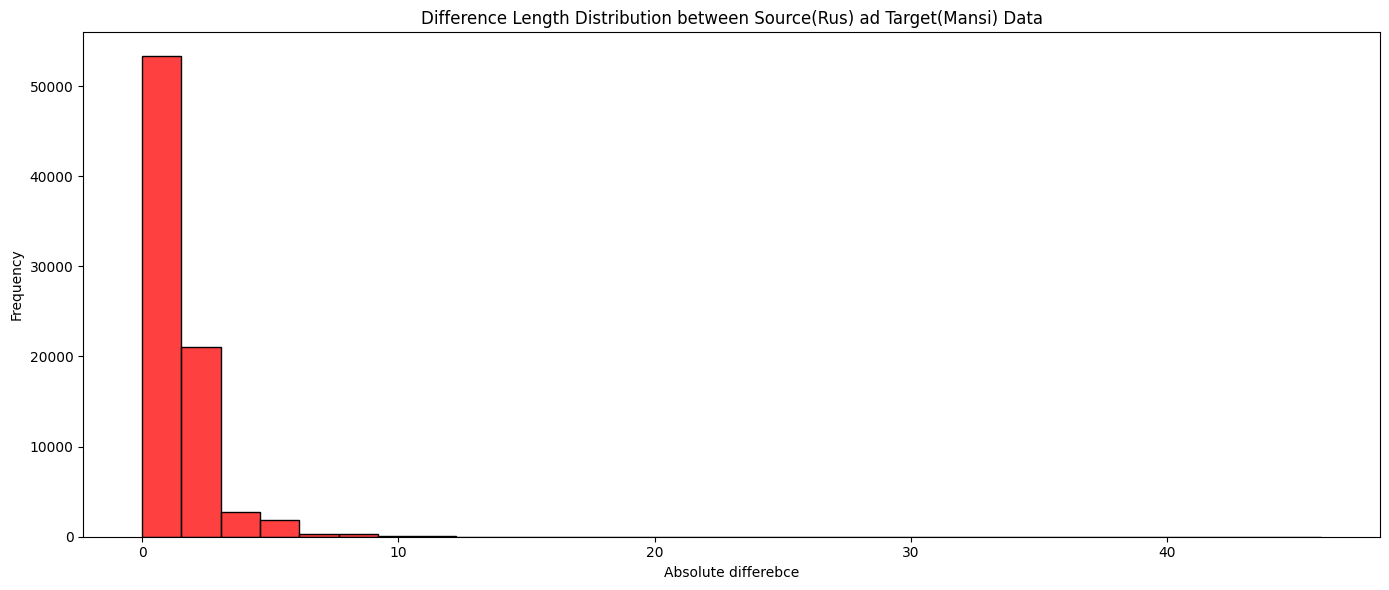

In [29]:
plt.figure(figsize=(14,6))

sns.histplot(differ, bins=30, color='red')
plt.title('Difference Length Distribution between Source(Rus) ad Target(Mansi) Data')
plt.xlabel('Absolute differebce')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('lenght_distribution2.png')
plt.show()

In [30]:
for irow, row in parallel_data.loc[suitable_lines][differ > 15].iterrows():
    print(irow)
    print(row.target)
    print(row.source)
    print()

1680
Касай суприще осыглатас, я-ты, ха̄р-о̄йка нуйгалаӈкве патыстэ, совенюре нуйгалас, котанэ-лӯтанэ що̄питас, нёвлянэ-лӯтанэ яктлас
Наточил он свой ножичек - и вот начинает он снимать шкуру с оленя-быка, снял с него всю шкуру, шкуру с ног и прочее подготовил, мясо и прочее кусками нарезал

5953
Та сыс ам ляпан ёхтынувум.	
Там наши работающие люди Марина Викторовна Самсонова, Мария Владимировна Ситникова, Людмила Мелентьева, Ирина Кошелева и Ирина Ибрагимова, наш мансийский мастер Александр Сайнахов, они там так усердно готовились.

7310
Ты āги исэ хуньт ōс тув вуйвес, Виткуль сāлыӈ сун ё̄рмалтаӈкв, манур ōлы тай, ат та ва̄йхаты, хунь хоты хōтпа Виткуль порслы, сāлыянэ пēлпыг патапēгыт, мат­кем ōс та сӯлтты.
И душу той девушки туда забрали, нарты Виткуля её душа поддерживает

7481
Та а̄ги тай сака номтыӈ, акваг та ӯнлы, ловиньты, нэ̄пак хансы. Та а̄ги тай сака номтыӈ, акваг нэ̄пак ловиньтым та ӯнланты, акваг нэ̄пак та хансы.
Эта девушка очень умная, всё сидит, читает, книги пишет.

157

Видно, что много предложений переведены не до конца, а только первые предложения. Сделаем так: если для target>source, то тогда берем первое предложение, если target==source, то оставляем как есть.

In [31]:
for irow, row in parallel_data.loc[suitable_lines][differ > 15].iterrows():
    sentences_target = re.split(r'(?<=[.!?])\s+', row.target) 
    sentences_source = re.split(r'(?<=[.!?])\s+', row.source)
    
    if len(sentences_target) > len(sentences_source):
        print(parallel_data.loc[irow].target)
        parallel_data.loc[irow, 'target'] = sentences_target[0]
        print(parallel_data.loc[irow].target, parallel_data.loc[irow].source)
        
        print()

Та сыс ам ляпан ёхтынувум.	
Та сыс ам ляпан ёхтынувум. Там наши работающие люди Марина Викторовна Самсонова, Мария Владимировна Ситникова, Людмила Мелентьева, Ирина Кошелева и Ирина Ибрагимова, наш мансийский мастер Александр Сайнахов, они там так усердно готовились.

Та а̄ги тай сака номтыӈ, акваг та ӯнлы, ловиньты, нэ̄пак хансы. Та а̄ги тай сака номтыӈ, акваг нэ̄пак ловиньтым та ӯнланты, акваг нэ̄пак та хансы.
Та а̄ги тай сака номтыӈ, акваг та ӯнлы, ловиньты, нэ̄пак хансы. Эта девушка очень умная, всё сидит, читает, книги пишет.

Тыт сав общинат о̄лэ̄гыт, мӯсхалыг туп аква-китыг рӯпиты, товат тай нэ̄паканыл щирыл салыт тыт янмалтэгыт, са̄лыяныл ма̄н аты ва̄щинтасанӯв. 
Тыт сав общинат о̄лэ̄гыт, мӯсхалыг туп аква-китыг рӯпиты, товат тай нэ̄паканыл щирыл салыт тыт янмалтэгыт, са̄лыяныл ма̄н аты ва̄щинтасанӯв. У нас здесь много общин есть, одна или две общины действительно хорошо работают, а у большинства пастбища для оленей лишь по бумагам оформлены, а на самом деле оленей у них нет, м

In [32]:
# Удалим кейс, который по нашему мнению никак не соответстует переводу:
parallel_data.drop([40687], axis=0, inplace=True)
suitable_lines = suitable_lines.drop([40687])

In [33]:
# предложение с разницей в 29 слов - здесь правильный перевод, но просто русский текст больше
differ = np.abs(parallel_data.loc[suitable_lines, 'source_length']-parallel_data.loc[suitable_lines, 'target_length'])
differ.describe()

count    79592.000000
mean         1.324794
std          1.453335
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         46.000000
dtype: float64

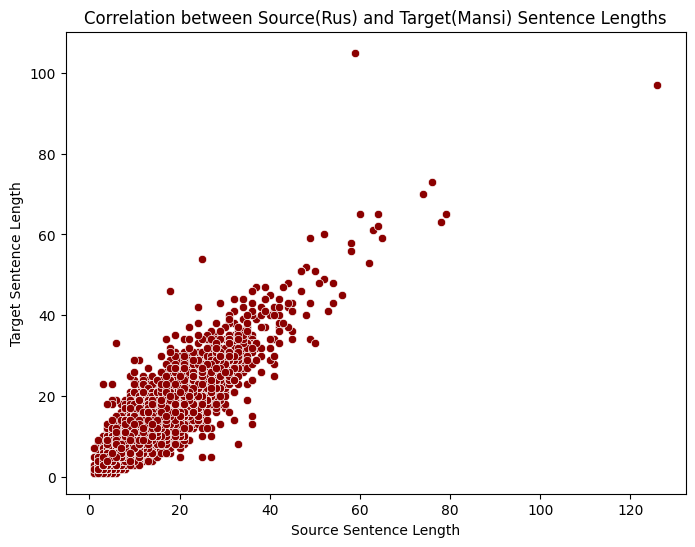

In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='source_length', y='target_length', data=parallel_data.loc[(differ < 20).index], color='darkred')
plt.title('Correlation between Source(Rus) and Target(Mansi) Sentence Lengths')
plt.xlabel('Source Sentence Length')
plt.ylabel('Target Sentence Length')
plt.savefig('corr_2.png')
plt.show()

In [35]:
parallel_data.reset_index(drop=True, inplace=True)

In [36]:
parallel_data.to_csv('prepared_overall_80K.csv', index=False)

### Теперь удалим стоп слова на русском и посмотрим распределение слов

In [37]:
import os

root = '/kaggle/input/stop-words-russian'
stop_words_russian = []

for file in os.listdir(root):
    with open(os.path.join(root, file), 'r') as stop_file:
        stop_words_russian += stop_file.readlines()
        
len(stop_words_russian)

2332

In [38]:
stop_words_russian = list(set(stop_words_russian))
len(stop_words_russian)

1357

In [39]:
sentences = ' '.join(parallel_data.source.tolist())
sentences = sentences.lower().split()
new_sentences = []
print(f'До удаления стоп слов: {len(sentences)}')
stop_words_russian = [sw.replace('\n', '') for sw in stop_words_russian]
    
for word in sentences:
    if word not in stop_words_russian:
        new_sentences.append(word)
    
print(f'После удаления стоп слов: {len(new_sentences)}')

До удаления стоп слов: 678602
После удаления стоп слов: 412383


In [40]:
import string

In [41]:
new_sentences = ' '.join(new_sentences)
new_sentences = new_sentences.translate(str.maketrans('', '', string.punctuation))

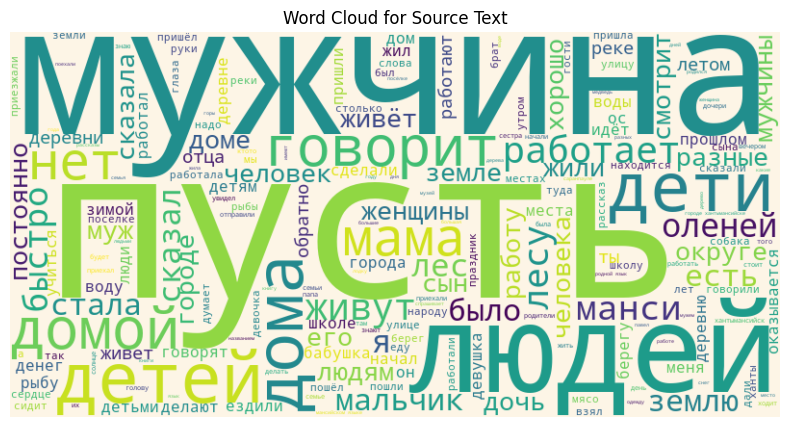

In [42]:
from collections import Counter
from wordcloud import WordCloud

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='oldlace').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.savefig('words.png')
    plt.show()

plot_wordcloud(new_sentences, "Word Cloud for Source Text")

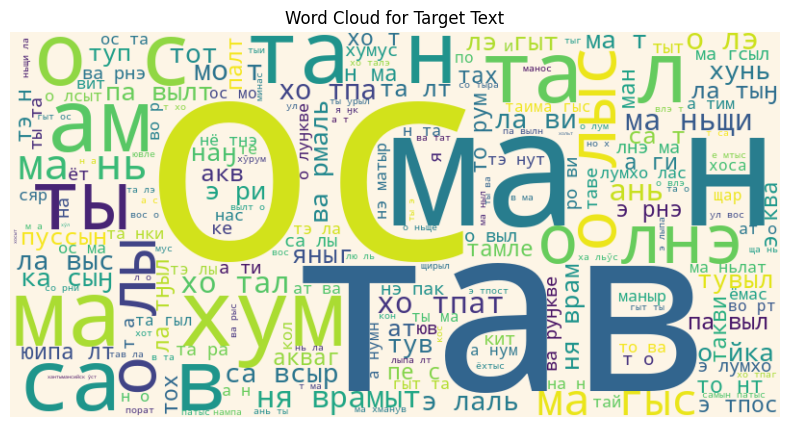

In [43]:
mansi_sentences = parallel_data.target.tolist()
mansi_sentences = ' '.join(mansi_sentences).lower()
mansi_sentences = mansi_sentences.translate(str.maketrans('', '', string.punctuation))
plot_wordcloud(mansi_sentences, "Word Cloud for Target Text")